In [21]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\ניל\AppData\Local\Tesseract-OCR\tesseract.exe'

In [11]:
rgb = cv2.imread("1.jpeg",1)

In [12]:
small = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)

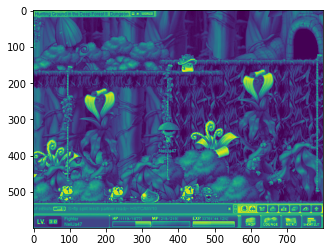

In [13]:
plt.imshow(small)

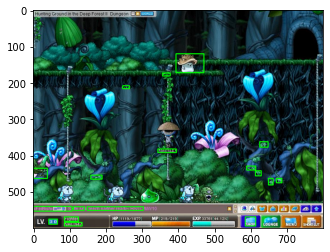

In [14]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
grad = cv2.morphologyEx(small, cv2.MORPH_GRADIENT, kernel)

_, bw = cv2.threshold(grad, 0.0, 255.0, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 1))
connected = cv2.morphologyEx(bw, cv2.MORPH_CLOSE, kernel)
# using RETR_EXTERNAL instead of RETR_CCOMP
contours, hierarchy = cv2.findContours(connected.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
#For opencv 3+ comment the previous line and uncomment the following line
#_, contours, hierarchy = cv2.findContours(connected.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

mask = np.zeros(bw.shape, dtype=np.uint8)

for idx in range(len(contours)):
    x, y, w, h = cv2.boundingRect(contours[idx])
    mask[y:y+h, x:x+w] = 0
    cv2.drawContours(mask, contours, idx, (255, 255, 255), -1)
    r = float(cv2.countNonZero(mask[y:y+h, x:x+w])) / (w * h)

    if r > 0.45 and w > 8 and h > 8:
        cv2.rectangle(rgb, (x, y), (x+w-1, y+h-1), (0, 255, 0), 2)

plt.imshow(rgb)

In [ ]:
map_image = cv2.imread("map.jpeg", 0)
map = map_image[]

In [25]:
img = cv2.imread("800px-Wikinews_Breaking_News.png", -1)
text = pytesseract.image_to_string(img)

TesseractError: (3221225794, '')